Hitting the 500 limit, 10-11 October
===================================================


In [1]:
# Import and Init the main tools

from lib.cached_data_loader import CachedDataLoader
from lib.panda_plotter import PandaPlotter
cdl = CachedDataLoader()
pp = PandaPlotter()


In [2]:
# Get hold of the dataframe 
sql = 'SELECT * FROM v__wcb__record_count_per_batch'
df = cdl.get_dataframe(sql)

mask = (df['ts'] >= '2019-10-10 17:00:00') & (df['ts'] <= '2019-10-11 14:00:00')
mdf = df.loc[mask]
mdf = mdf[~mdf["ts"].duplicated()]
mdf = cdl.reindex_by_timestamp(mdf, "ts", "min")



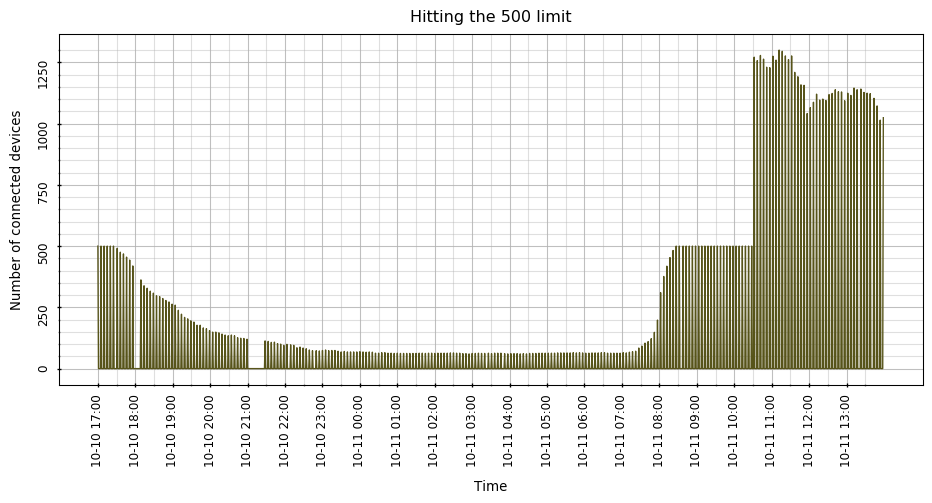

In [5]:
plotconfig = {
    "title": "Hitting the 500 limit",
    "plots": [
        {
            "data": mdf,
            "title": "",
            "x_column": "ts",
            "y_column": ["record_count"],
            "x_label": "Time",
            "y_label": "Number of connected devices",
            "x_major_ticks_freq": 60,
            "x_minor_ticks_freq": 30,
            "y_major_ticks_freq": 250,
            "y_minor_ticks_freq": 50,
        }
    ],
    "style": {
        "palette_color": "olive yellow",
        "x_axis_value_rotation": 90,
        "y_axis_value_rotation": 90,
        "x_axis_value_format": "%m-%d %H:%M",
        "y_axis_value_format": "",
    }
}
pp.plot(plotconfig)